In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress 
from uncertainties import unumpy,ufloat
%matplotlib inline

In [2]:
df_carga = pd.read_csv('carga.csv')
df_descarga = pd.read_csv('descarga.csv')

In [3]:
df_carga['dI'] = np.round(0.01 * (100),1)

#df['dI(mA)'] = np.round(df['FundoEscala(Corrente(mA))'] * 0.02, 1)
df_carga['ln(I(A))'] = np.round(np.log(df_carga['I(A)']),1)
df_descarga['ln(I(A))'] =np.round(np.log(df_descarga['I(A)']),1)


In [4]:
df_descarga['dI'] = np.round(0.01 * (100),1)

In [5]:
# Dados Para a carga do capacitor
Capacitancia = 60 # micro-farad
dC = 6
Resistencia = 311
dR = 0.05 * Resistencia
# Tensao Maxima disponivel = 30 V
# Tensao amxima suportada resistor = 657 V
# Corrente para tensao disponível = 50 micro A
# Escala adequada = 50 micro A
# Corrente Maxima inicial do circuito = 50

In [6]:
df_carga.head(15)

,I(A),t1,t2,t3,t4,t5,<t>,d<t>,dI,ln(I(A))
0,45,2.45,2.09,2.19,2.16,2.44,2.27,0.17,1.0,3.8
1,40,4.86,4.32,4.81,4.68,4.74,4.68,0.21,1.0,3.7
2,35,7.33,7.07,7.30,7.22,7.30,7.24,0.11,1.0,3.6
3,30,10.48,10.02,10.39,10.11,10.25,10.25,0.19,1.0,3.4
4,25,13.91,13.40,13.56,13.80,13.95,13.72,0.24,1.0,3.2
5,20,18.21,18.17,18.22,17.98,18.20,18.16,0.10,1.0,3.0
6,15,23.77,23.40,23.69,23.38,23.94,23.64,0.24,1.0,2.7
7,12,27.93,27.83,27.75,28.37,27.92,27.96,0.24,1.0,2.5
8,10,31.75,31.46,31.29,31.28,31.37,31.43,0.19,1.0,2.3
9,7,37.56,37.90,38.00,37.88,38.22,37.91,0.24,1.0,1.9


In [7]:
df_descarga.head(16)

,I(A),t1,t2,t3,t4,t5,<t>,d<t>,ln(I(A)),dI
0,45,2.33,2.89,2.77,2.72,2.81,2.70,0.22,3.8,1.0
1,40,4.81,5.13,5.10,5.10,5.01,5.03,0.13,3.7,1.0
2,35,7.42,7.88,7.73,7.73,7.55,7.66,0.18,3.6,1.0
3,30,10.46,10.76,10.85,10.80,10.59,10.69,0.16,3.4,1.0
4,25,14.00,14.36,14.14,14.10,14.14,14.15,0.13,3.2,1.0
5,20,18.40,18.51,18.68,18.49,18.28,18.47,0.15,3.0,1.0
6,15,23.73,24.13,24.28,24.16,24.08,24.08,0.21,2.7,1.0
7,12,28.03,28.68,28.52,28.28,27.99,28.30,0.30,2.5,1.0
8,10,31.39,31.83,31.80,32.04,31.73,31.67,0.28,2.3,1.0
9,7,38.46,38.50,39.00,38.68,38.21,38.57,0.29,1.9,1.0


### Definição da curva exponencial

$f(x) = a e^{-bx} + c$

In [35]:
def exp(x, a,b,c):
    return a * np.exp(-b * x) + c

In [45]:
popt, pcov = curve_fit(exp, df_carga['<t>'], df_carga['I(A)'])
popt2, pcov2 = curve_fit(exp, df_descarga['<t>'], df_descarga['I(A)'])

x_data = np.linspace(-1,65,num=300)

/home/filipe/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


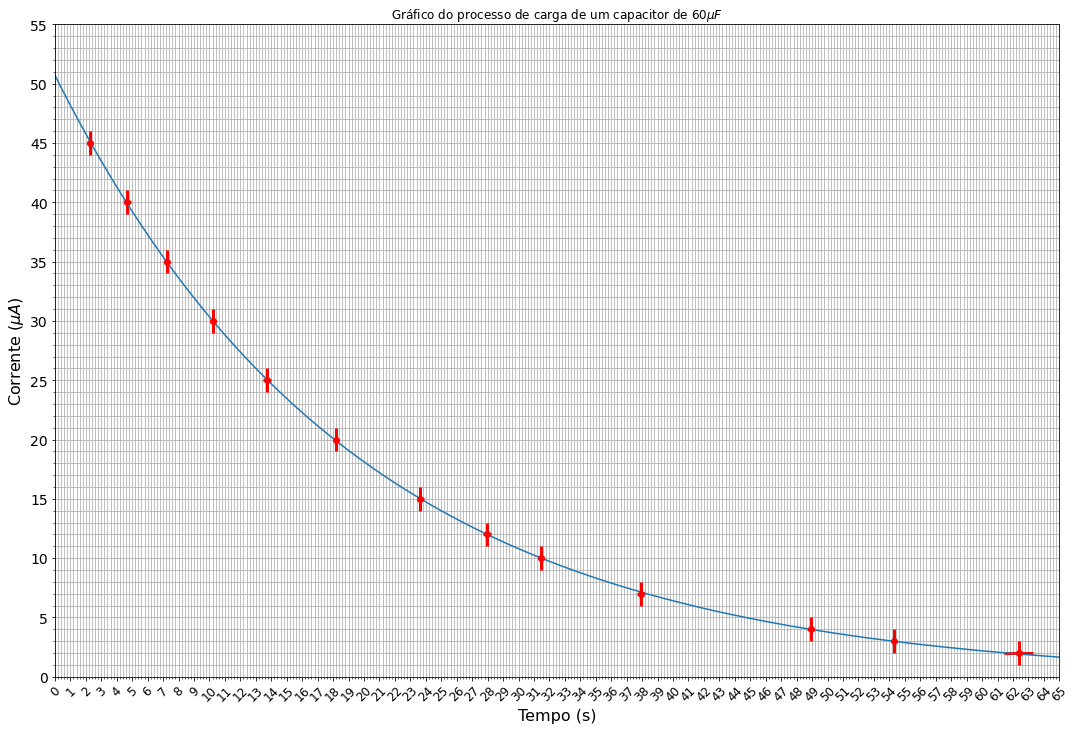

In [44]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))

#plt.plot(df_carga['<t>'],df_carga['I(A)'])
plt.plot(x_data, exp(x_data, *popt))
plt.errorbar(df_carga['<t>'],df_carga['I(A)'],
             yerr=df_carga['dI'], 
             xerr=df_carga['d<t>'], 
             fmt='o',elinewidth=3,color='red')

#plt.scatter(df['I(ma)'],df['V(V)'])
#plt.plot(df['I(ma)'],df['V(V)'])

plt.xlabel('Tempo (s)',fontsize=16)
plt.ylabel(r'Corrente ($\mu A$)', fontsize=16)

#Título:
plt.title(r'Gráfico do processo de carga de um capacitor de $60 \mu F$')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#ax.set_yscale('log')
plt.ylim(0,55)
ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=12, rotation=45)
plt.xlim([0,65])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='x', which='minor', length=2,width='1')
#plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')
# plt.savefig('VxI.svg', dpi=1200)

plt.grid(which='both')
# plt.grid()
plt.savefig('carga.pdf', dpi=1200)

plt.show()


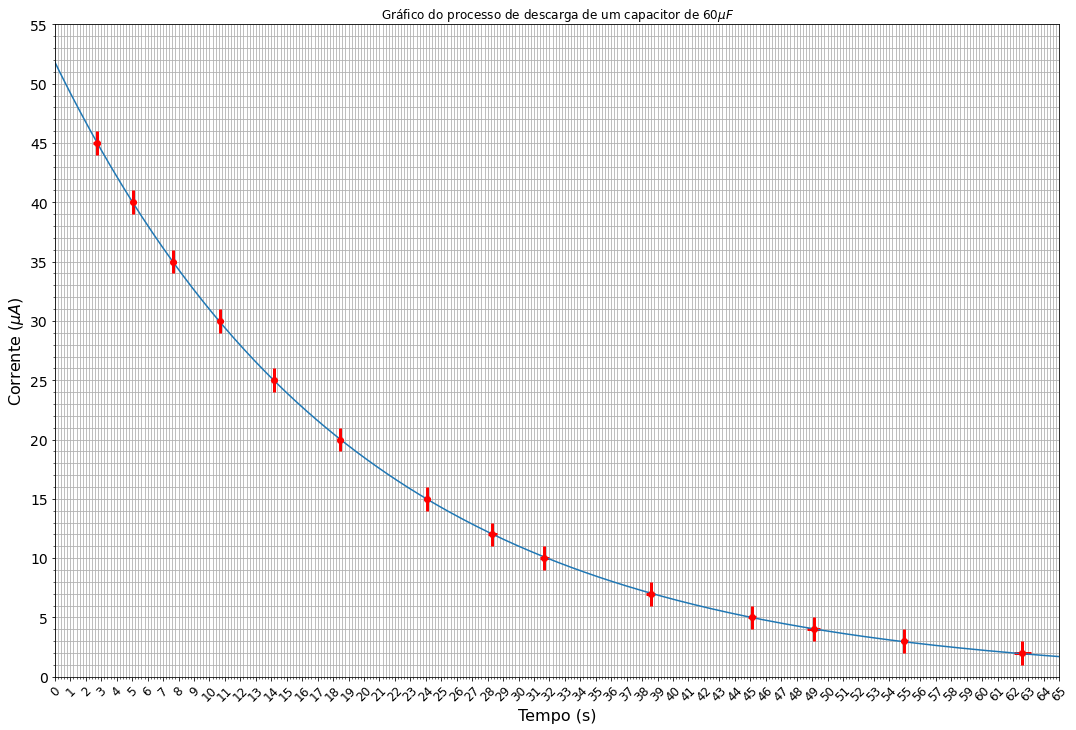

In [46]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))

#plt.plot(df_descarga['<t>'], df_descarga['I(A)'],)

plt.plot(x_data, exp(x_data, *popt2))

plt.errorbar(df_descarga['<t>'],df_descarga['I(A)'],
             yerr=df_descarga['dI'], 
             xerr=df_descarga['d<t>'], 
             fmt='o',elinewidth=3,color='red')

#plt.scatter(df['I(ma)'],df['V(V)'])
#plt.plot(df['I(ma)'],df['V(V)'])

plt.xlabel('Tempo (s)',fontsize=16)
plt.ylabel(r'Corrente ($\mu A$)', fontsize=16)

#Título:
plt.title(r'Gráfico do processo de descarga de um capacitor de $60 \mu F$')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
#ax.set_yscale('log')
plt.ylim(0,55)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=12, rotation=45)
plt.xlim(0,65)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.grid(which='both')
plt.savefig('descarga.pdf', dpi=1200)

plt.show()


In [10]:
def reta(x,m,b):
    return m*x + b

In [11]:
slope, intercept, r_value, p_value, stderr = linregress(df_carga['<t>'], df_carga['ln(I(A))'])
slope2, intercept2, r_value2, p_value2, stderr2 = linregress(df_descarga['<t>'], df_descarga['ln(I(A))'])


In [12]:
Corrente_fit = reta(df_carga['<t>'],slope, intercept )
Corrente_fit2 = reta(df_descarga['<t>'],slope2, intercept2 )

In [13]:
# Carga
print('coeficiente angular = ', slope)
print('coeficiente linear = ', intercept)

# Descagar
print('coeficiente angular2 = ', slope2)
print('coeficiente linear2 = ', intercept2)


coeficiente angular =  -0.05218499291404975
coeficiente linear =  3.937777151588678
coeficiente angular2 =  -0.05222016821608862
coeficiente linear2 =  3.959087566004449


In [14]:
tau =- 1/slope
tau2 =- 1/slope2
print("tau = ",tau)
print("tau2 = ",tau2)

tau =  19.162597217307855
tau2 =  19.149689366414336


In [15]:
C = tau/Resistencia

In [16]:
print('Capaciatancia = ',C * 10**3)


Capaciatancia =  61.61606822285484


In [17]:
# Incerteza
media_pond = 0 
for i in range(len(df_carga['ln(I(A))'])):
    media_pond = media_pond + df_carga['ln(I(A))'][i] * df_carga['ln(I(A))'][i]
    media_pond = media_pond/df_carga['ln(I(A))'].sum()

print('Incerteza da reta = ', np.round(media_pond,4))

Incerteza da reta =  0.0159


In [18]:
print('Capaciatancia = ',C * 10**3, '+/- ',np.round(media_pond,4)* 10**3)


Capaciatancia =  61.61606822285484 +/-  15.9


In [19]:
media_pond/C

0.25743357681509704

In [20]:
Capacitancia * Resistencia * 10**-3

18.66

In [21]:
capa = ufloat(Capacitancia,dC)
res = ufloat(Resistencia,dR)

In [22]:
capa * res * 10**-3

18.66+/-2.0862514230073037

In [23]:
capa

60.0+/-6.0

/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


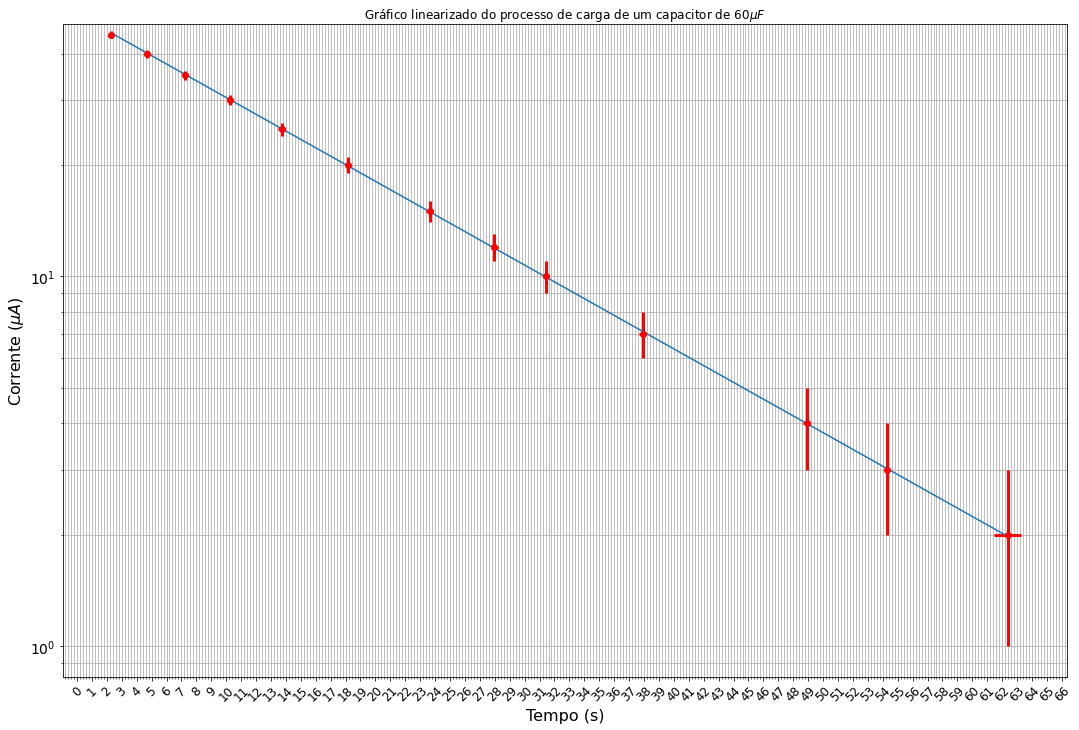

In [24]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(df_carga['<t>'],np.exp(Corrente_fit))
plt.errorbar(df_carga['<t>'],df_carga['I(A)'],
             yerr=df_carga['dI'], 
             xerr=df_carga['d<t>'], 
             fmt='o',elinewidth=3,color='red')

#plt.scatter(df['I(ma)'],df['V(V)'])
#plt.plot(df['I(ma)'],df['V(V)'])

plt.xlabel('Tempo (s)',fontsize=16)
plt.ylabel(r'Corrente ($\mu A$)', fontsize=16)

#Título:
plt.title(r'Gráfico linearizado do processo de carga de um capacitor de $60 \mu F$')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
ax.set_yscale('log')
plt.ylim(0,48)
#ax.yaxis.set_major_locator(plt.MultipleLocator(5))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=12, rotation=45)
#plt.xlim([0,47])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='x', which='minor', length=2,width='1')
#plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')
# plt.savefig('VxI.svg', dpi=1200)

plt.grid(which='both')
# plt.grid()
plt.savefig('carga-log.pdf', dpi=1200)

plt.show()

/home/filipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


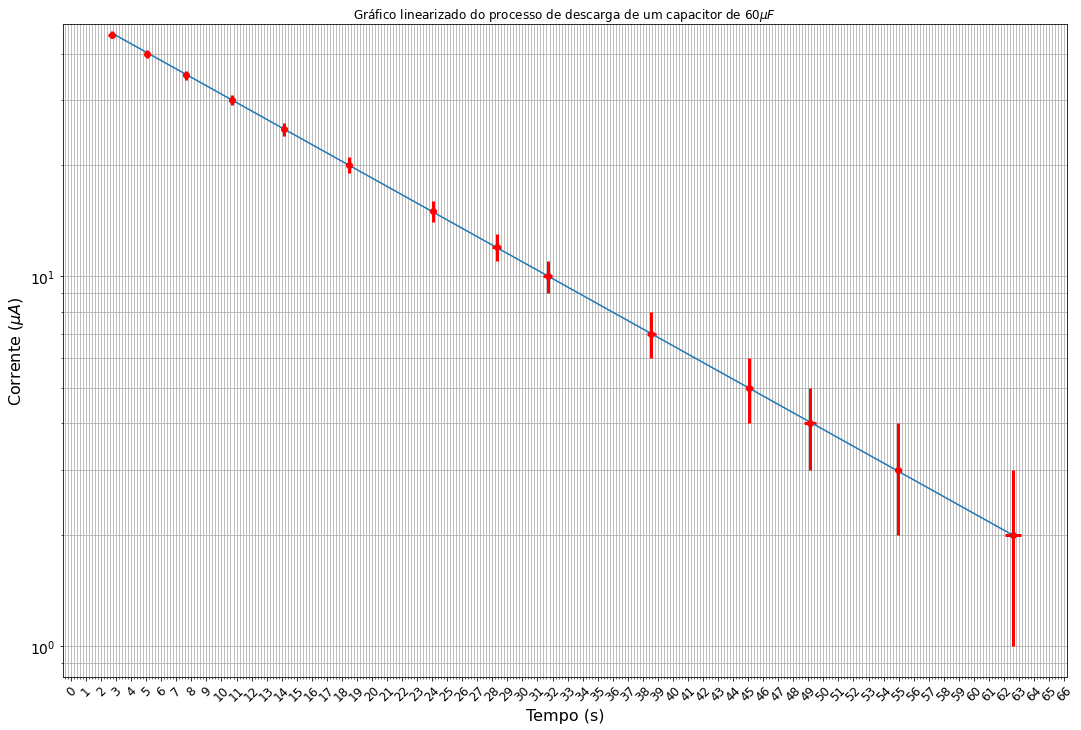

In [25]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(df_descarga['<t>'],np.exp(Corrente_fit2))
plt.errorbar(df_descarga['<t>'],df_descarga['I(A)'],
             yerr=df_descarga['dI'], 
             xerr=df_descarga['d<t>'], 
             fmt='o',elinewidth=3,color='red')

#plt.scatter(df['I(ma)'],df['V(V)'])
#plt.plot(df['I(ma)'],df['V(V)'])

plt.xlabel('Tempo (s)',fontsize=16)
plt.ylabel(r'Corrente ($\mu A$)', fontsize=16)

#Título:
plt.title(r'Gráfico linearizado do processo de descarga de um capacitor de $60 \mu F$')


# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
ax.set_yscale('log')
plt.ylim(0,48)
#ax.yaxis.set_major_locator(plt.MultipleLocator(5))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='y', which='minor', length=3,width='1')
#plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=12, rotation=45)
#plt.xlim([0,47])

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.tick_params(axis='x', which='minor', length=2,width='1')
#plt.tick_params(axis='x', which='major', length=4,width='2')

plt.grid(which='both')
# plt.grid()
plt.savefig('descarga-log.pdf', dpi=1200)

plt.show()